In [53]:
import numpy as np
import matplotlib.pyplot as plt


# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [54]:
# load package for loading data
import pandas as pd

In [55]:
housing_dataset = pd.read_csv("boston_housing.csv")
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [56]:

X = housing_dataset[['RM']]
y = housing_dataset['MEDV']
X, y


(        RM
 0    6.575
 1    6.421
 2    7.185
 3    6.998
 4    7.147
 ..     ...
 501  6.593
 502  6.120
 503  6.976
 504  6.794
 505  6.030
 
 [506 rows x 1 columns],
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 506, dtype: float64)

In [57]:
# load package for spliting data
from sklearn.model_selection import train_test_split 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Data Visualization

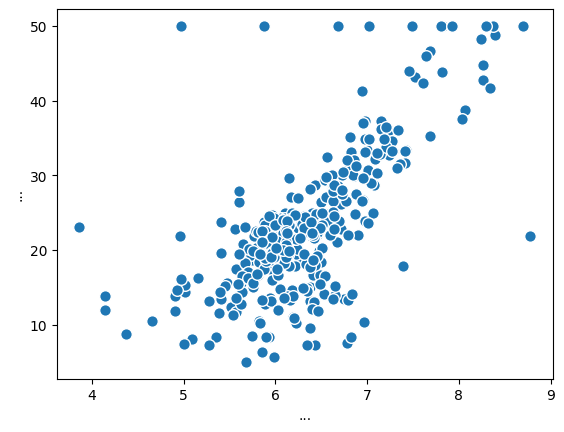

In [59]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('...')
plt.ylabel('...')
plt.show()

### Linear Regression (Base)

In [60]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of training examples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### Gradient Descent

In [151]:
import numpy as np

class Gradient_Decents:
    def __init__(self, learning_rate=1e-8, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.costs = []

    def fit(self, X, y):
         
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        # Number of training examples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            self.costs.append(cost)
            

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

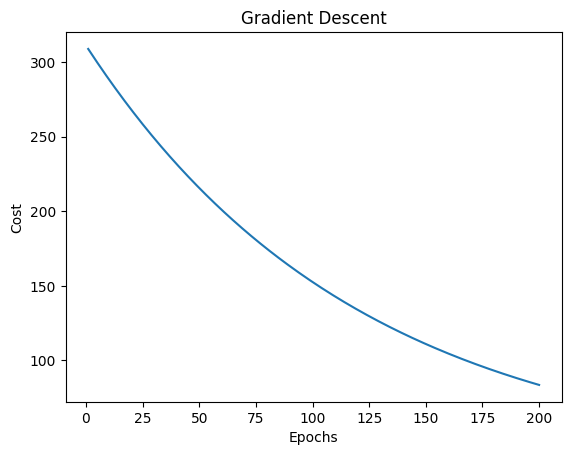

In [62]:
# Initialize the model
reg_GD =Gradient_Decents()

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

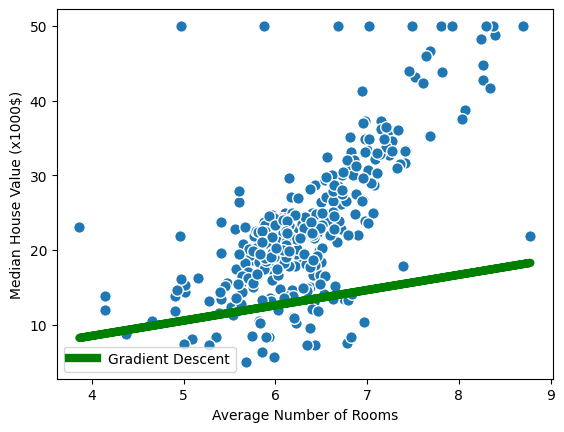

In [63]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [103]:
from sklearn.linear_model import SGDRegressor


- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [104]:
# Initialize the model
reg_SGD = SGDRegressor()
# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

Visualize the prediction of Stochastic Gradient Descent model on Training Data

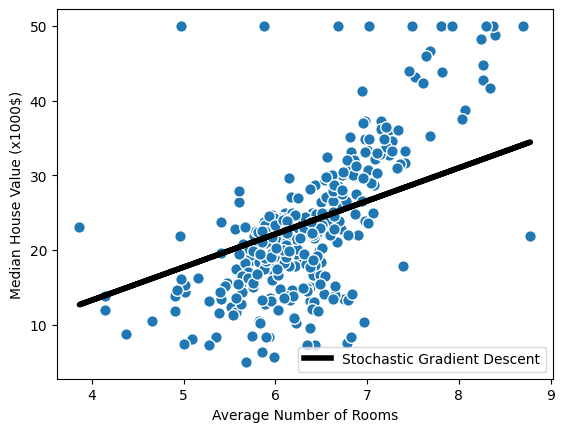

In [105]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [106]:
from sklearn.linear_model import LinearRegression


In [107]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

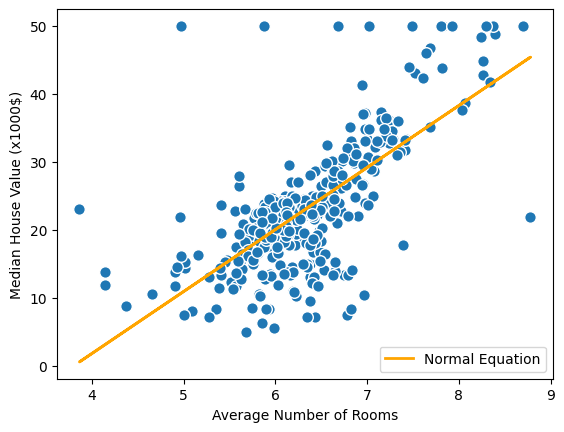

In [108]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

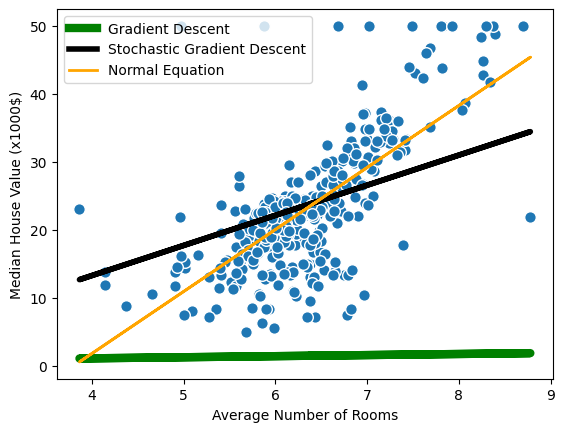

In [109]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [71]:
w_GD = reg_GD.weights
w_SGD = reg_SGD.coef_
w_NE = reg_NE.coef_
print(w_GD)
print(w_SGD)
print(w_NE)


[2.04522012]
[4.72452073]
[9.1181022]


Performance Comparisons (on Testing Set)

In [72]:
y_pred_GD = reg_GD.predict(X_test)

In [73]:
y_pred_SGD = reg_SGD.predict(X_test)

In [74]:
y_pred_NE = reg_NE.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [76]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 8.924892
MAE of SGD: 5.217791
MAE of NE: 4.314224


In [77]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 131.88764
MSE of SGD: 50.630635
MSE of NE: 40.35145


In [78]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -0.769993
R2 of SGD: 0.320514
R2 of NE: 0.458465


## Experiment with Standardized Data

In [111]:
# Re-load the dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [112]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [113]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [82]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[["RM"]] 
y = housing_dataset["MEDV"]

In [83]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new,y,test_size=0.3,random_state=42)


### Gradient Descent

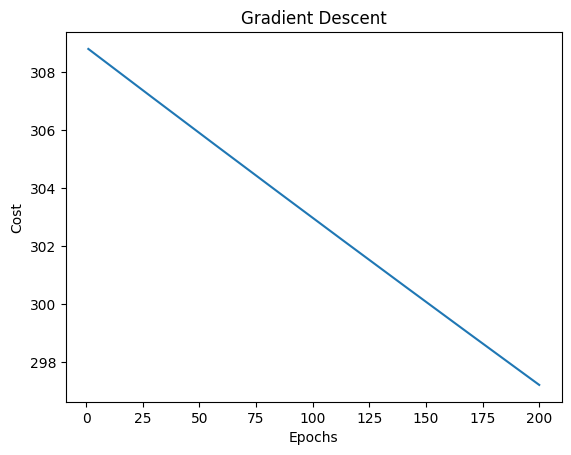

In [84]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
 

reg_GD = Gradient_Decents()

# Train model on standardized data
reg_GD.fit(X_train_norm,y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



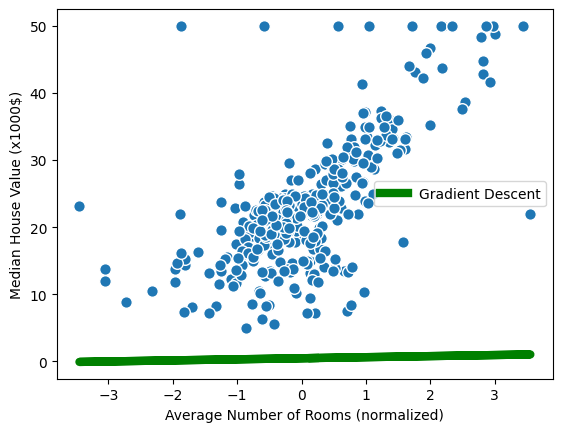

In [114]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [115]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
from sklearn.linear_model import SGDRegressor 

reg_SGD =SGDRegressor(eta0 = 1e-3, max_iter=200,random_state=42, learning_rate = 'constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


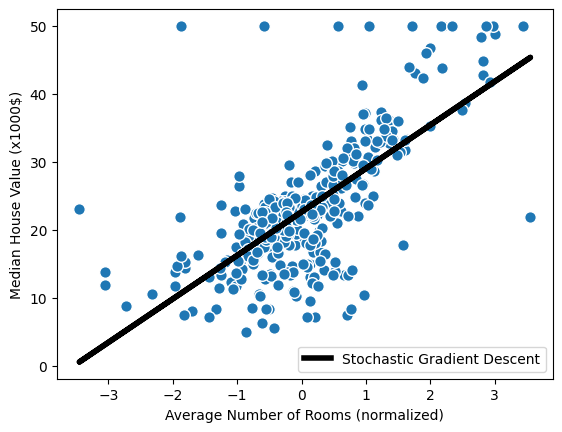

In [116]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [117]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

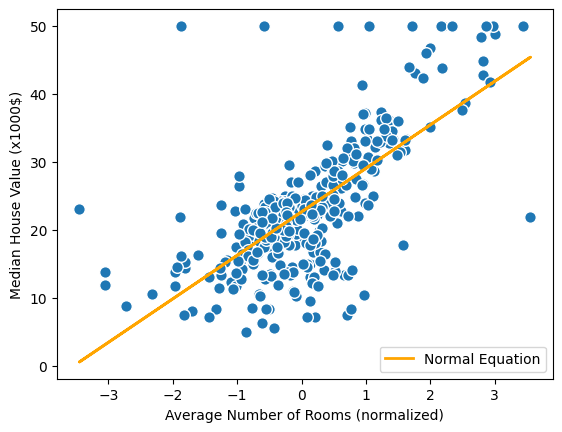

In [118]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

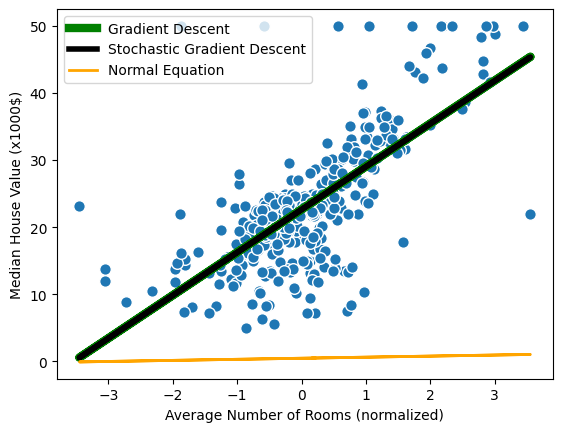

In [90]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [93]:
w_GD = reg_GD.costs
w_GD

[np.float64(308.8122316384181),
 np.float64(308.7527881303264),
 np.float64(308.69335700848706),
 np.float64(308.63393827031),
 np.float64(308.57453191320604),
 np.float64(308.5151379345863),
 np.float64(308.4557563318625),
 np.float64(308.39638710244697),
 np.float64(308.33703024375257),
 np.float64(308.27768575319254),
 np.float64(308.2183536281809),
 np.float64(308.1590338661321),
 np.float64(308.0997264644611),
 np.float64(308.04043142058345),
 np.float64(307.98114873191525),
 np.float64(307.9218783958731),
 np.float64(307.8626204098741),
 np.float64(307.80337477133617),
 np.float64(307.7441414776773),
 np.float64(307.68492052631643),
 np.float64(307.6257119146729),
 np.float64(307.5665156401665),
 np.float64(307.5073317002177),
 np.float64(307.44816009224746),
 np.float64(307.38900081367717),
 np.float64(307.32985386192905),
 np.float64(307.2707192344256),
 np.float64(307.21159692858987),
 np.float64(307.15248694184555),
 np.float64(307.0933892716169),
 np.float64(307.034303915328

In [94]:
w_SGD = reg_SGD.coef_
w_SGD

array([6.39567675])

In [96]:
w_NE = reg_NE.coef_
w_NE

array([6.40020122])

In [97]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [98]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [99]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [100]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 20.973868
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [101]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 512.706812
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [102]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -5.880761
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [120]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [137]:
target="MEDV"
X = housing_dataset.drop("MEDV",axis=1)
y = housing_dataset[target]

In [138]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

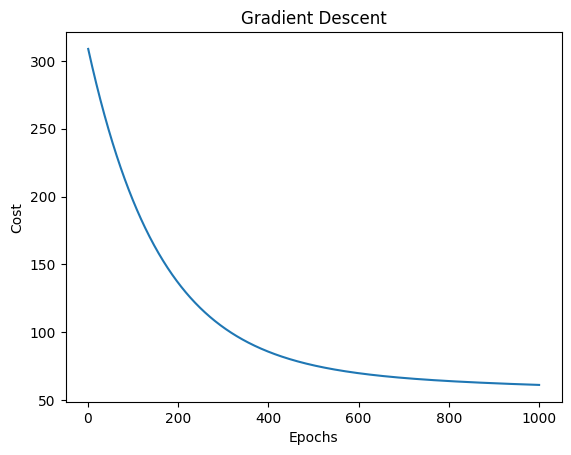

In [152]:
# Initalize the GD model
reg_GD = Gradient_Decents()

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [153]:
# Initialize the SGD model
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

### Normal Equation

In [ ]:
# Add the '1' column to data


In [154]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [155]:
w_GD = reg_GD.weights
w_GD

array([-1.12311546e-04,  1.75625242e-03,  4.98666430e-04,  1.10268560e-05,
        3.90264633e-05,  5.62972547e-04,  4.37468132e-03,  3.75401233e-04,
        2.84276104e-04,  2.21897094e-02,  1.34947490e-03,  3.11783392e-02,
        4.36966011e-04])

In [156]:
w_SGD = reg_SGD.coef_
w_SGD

array([-1.64478319e+11, -9.94261592e+10, -3.08731418e+11, -2.01954407e+10,
       -1.04331000e+10, -1.55541741e+11, -1.17523930e+11, -3.00681677e+11,
       -3.45386383e+11, -5.77389067e+10, -3.64670047e+11, -1.45043818e+11,
        5.55756853e+10])

In [157]:
w_NE = reg_NE.coef_
w_NE

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [158]:
y_pred_GD = reg_GD.predict(X_test)

In [159]:
y_pred_SGD = reg_SGD.predict(X_test)

In [160]:
y_pred_NE = reg_NE.predict(X_test)

In [161]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 7.256103
MAE of SGD: 99332226808878.02
MAE of NE: 3.16271


In [162]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 104.026169
MSE of SGD: 1.0095288358508438e+28
MSE of NE: 21.517444


In [163]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -0.396079
R2 of SGD: -1.3548341109132396e+26
R2 of NE: 0.711226


## Experiment with Standardized Data

In [164]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [165]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [167]:
# Initialize the standardize scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [168]:
target="MEDV"
X_new = housing_dataset.drop(target,axis=1)
y =housing_dataset[target]

In [169]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new,y,test_size=0.3,random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

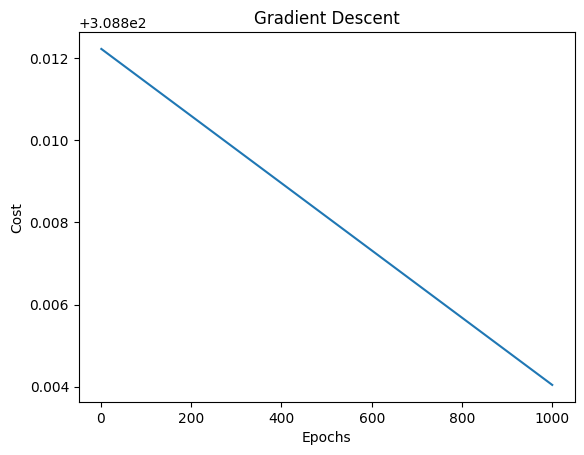

In [170]:
# Initalize the GD model
reg_GD = Gradient_Decents()

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [171]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor()

### Normal Equation (sklearn)

In [172]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [173]:
w_GD = reg_GD.weights
w_GD

array([-3.83152998e-05,  3.03327399e-05, -4.36828771e-05,  2.57087377e-05,
       -3.33121543e-05,  8.04587066e-05, -3.04415830e-05,  1.96408457e-05,
       -3.87235171e-05, -4.35122849e-05, -6.69671615e-05,  3.66379947e-05,
       -7.72139380e-05])

In [174]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.51253818, -1.07219222,  0.69899464,  0.15988482,  0.81348366,
       -1.6367573 ,  2.87681179, -0.32437946, -2.83422184,  1.58136957,
       -0.84587874, -1.93070277,  1.0618574 , -3.87838978])

In [175]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [176]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [177]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [178]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [179]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.407699
MAE of SGD: 3.170357
MAE of NE: 3.16271


In [180]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 532.797817
MSE of SGD: 21.772793
MSE of NE: 21.517444


In [181]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -6.150392
R2 of SGD: 0.707799
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

In [1]:
# Định nghĩa R2 
#   R² định lượng tỷ lệ phương sai của biến phụ thuộc có thể được dự đoán từ các biến độc lập.
#  Công thức : 1- tổng của các(y_thucte - y_dudoan)^2/tổng của các(y_thucte-y_trungbinh)^2
# về khoảng giá trị của R2 sẽ nằm trong khoảng từ âm vô cùng cho đến 1:
#  -Nếu giá trị càng gần 1 thì việc dự đoán càng chính xác 
#  -Nếu giá trị càng gần 0 thì việc dự đoán là càu bằng và mô hình chỉ lấy giá trị trung bình mà áp vào 
#  -Nếu giá trị bé hơn 0 thì  Mô hình hoạt động kém hơn so với một mô hình dựa trên giá trị trung bình của biến phụ thuộc 
# ƯU điểm của R2 score so với MSE và MAE:
# -R² Score: Cung cấp một tiêu chuẩn để đánh giá hiệu suất mô hình, với giá trị 1 cho thấy mô hình hoàn hảo và 0 cho thấy không có sức giải thích.
# -MSE và MAE: Không cung cấp một tiêu chuẩn rõ ràng về mô hình tốt hay xấu.
